# Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier



sns.set()

# Data Preprocessing

### Importing the Database

In [2]:
raw_data = pd.read_csv('ml_datasource.csv')
raw_data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [3]:
raw_data.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000,17761.000000
mean,123.205112,31.082906,1.196442,0.277800,0.176341,1.242772,0.091830
std,90.675102,90.593660,0.646788,1.659998,1.099900,7.755386,0.288795
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,6.800000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,204.000000,34.300000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,5312.300000,16.000000,76.000000,63.000000,457.410000,1.000000


To avoid accidentally modifying the original data source, create a copy of raw data.

In [4]:
data = raw_data.copy()

### Removing Outliers

Create a continuous probability density curve using the kdeplot method.

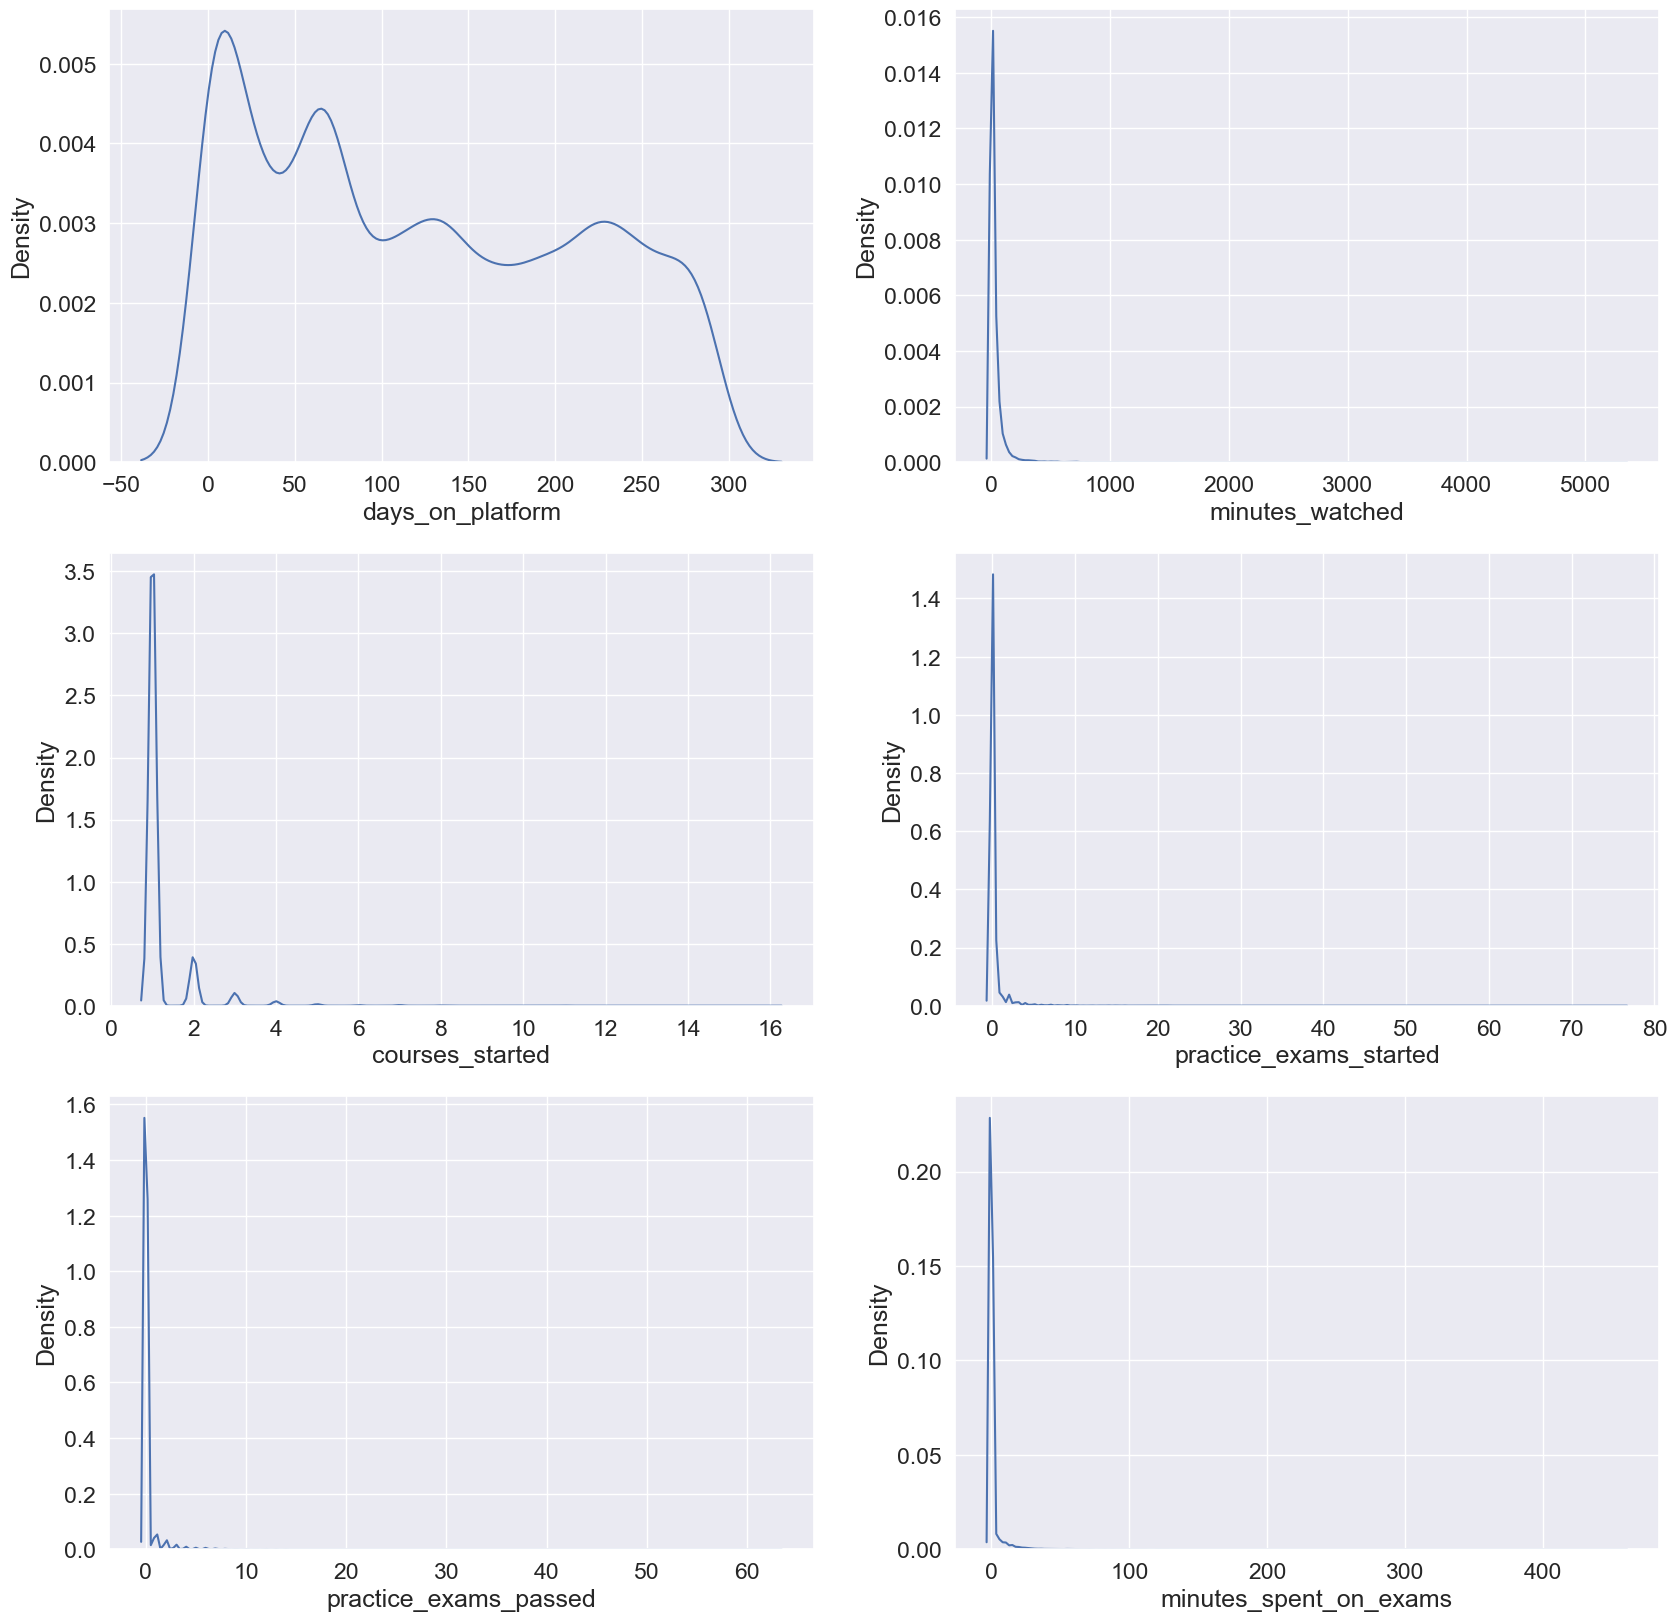

In [5]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(3, 2, figsize=(20,20))
sns.kdeplot(data=data['days_on_platform'], ax=axes[0,0])
sns.kdeplot(data=data['minutes_watched'], ax=axes[0,1])
sns.kdeplot(data=data['courses_started'], ax=axes[1,0])
sns.kdeplot(data=data['practice_exams_started'], ax=axes[1,1])
sns.kdeplot(data=data['practice_exams_passed'], ax=axes[2,0])
sns.kdeplot(data=data['minutes_spent_on_exams'], ax=axes[2,1]);

Looking at the distributions, we can see long tails on the right for most of the distributions. Moreover, analyzing the results of describe function, we can see the presence of several outliers only observing the difference between the maximum observed value of a feature and its median value.
For this reason, I've decided to use 4 conditions: only the rows where minutes_watched is less than or equal to 1,000, courses_started is less than or equal to 10, practice_exams_started is less than or equal to 10, and minutes_spent_on_exams is less than or equal to 40.

In [6]:
first_cond = data['minutes_watched'] <= 1000
second_cond = data['courses_started'] <= 10
third_cond = data['practice_exams_started'] <= 10
fourth_cond = data['minutes_spent_on_exams'] <= 40

In [7]:
#Boolean indexing
filt_data = data[first_cond & second_cond & third_cond & fourth_cond]

In [8]:
#check the results
filt_data.describe()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000
mean,123.454102,27.145342,1.177295,0.183195,0.119029,0.778405,0.092137
std,90.773394,56.290650,0.559075,0.817034,0.588701,3.476651,0.289227
min,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,113.000000,6.700000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,204.000000,33.400000,1.000000,0.000000,0.000000,0.000000,0.000000
max,292.000000,994.200000,9.000000,10.000000,9.000000,40.000000,1.000000


Density plots after removing Outliers

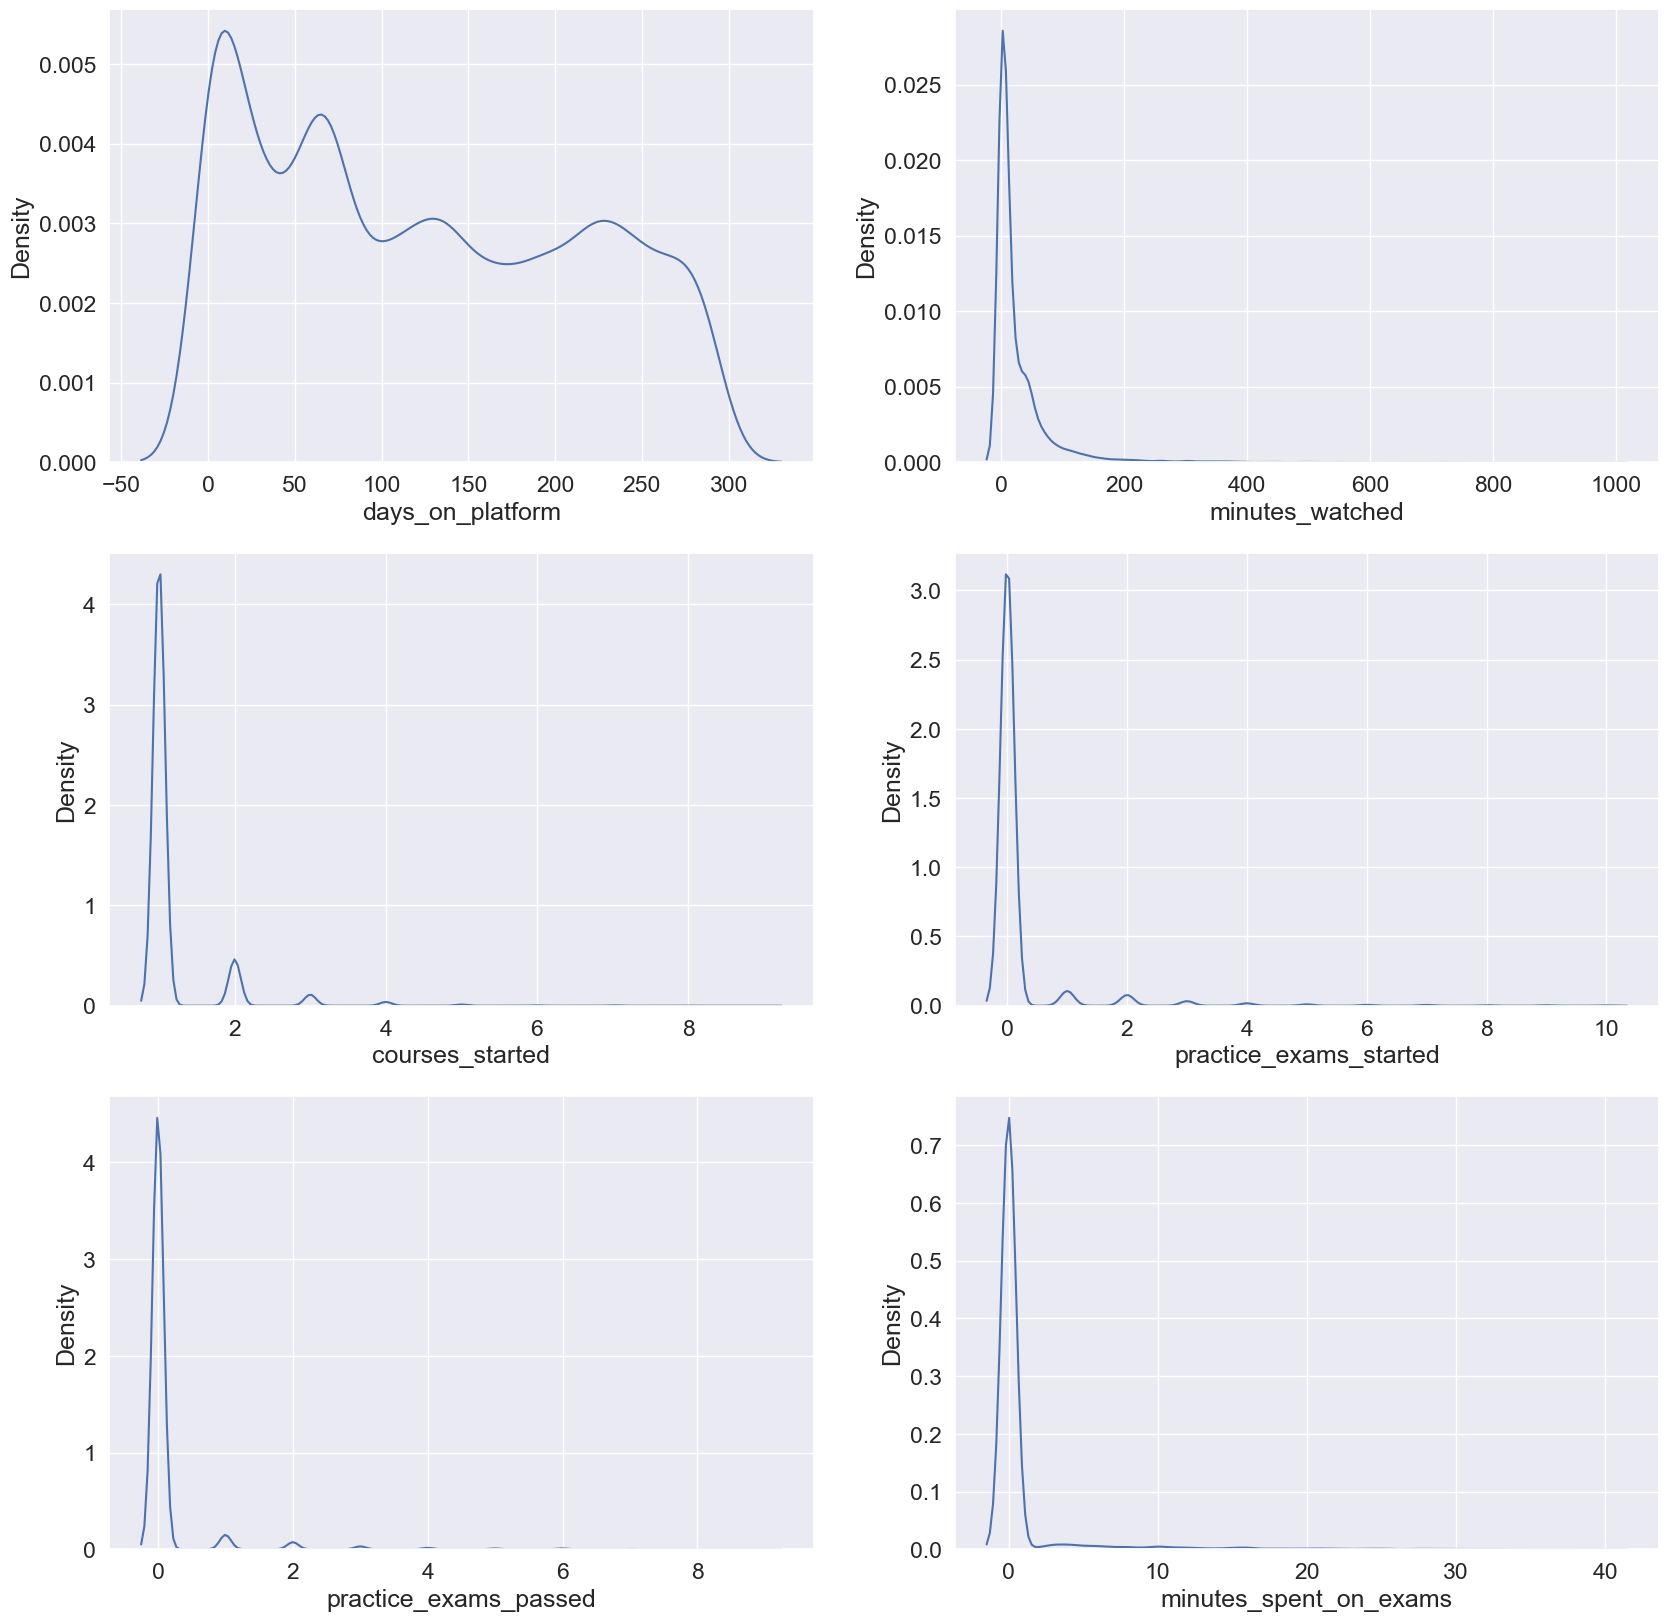

In [9]:
sns.set(font_scale=1.5)
fig, axes = plt.subplots(3, 2, figsize=(20,20))
sns.kdeplot(data=filt_data['days_on_platform'], ax=axes[0,0])
sns.kdeplot(data=filt_data['minutes_watched'], ax=axes[0,1])
sns.kdeplot(data=filt_data['courses_started'], ax=axes[1,0])
sns.kdeplot(data=filt_data['practice_exams_started'], ax=axes[1,1])
sns.kdeplot(data=filt_data['practice_exams_passed'], ax=axes[2,0])
sns.kdeplot(data=filt_data['minutes_spent_on_exams'], ax=axes[2,1]);

Even though we can see the distributions improvements, I want to remember that we can filter out the outliers in different ways (e.g. using percentiles, or using different values for the conditions). I've decided to use this values because I wanted to find a good trade-off between loss of information and gain of data quality.

### Checking for Multicollinearity

Using the variance inflation factor, we will study the multicollinearity.

In [10]:
filt_data.columns.to_numpy()

array(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started',
       'practice_exams_passed', 'minutes_spent_on_exams', 'purchased'],
      dtype=object)

In [11]:
#select only numerical feauters
X = filt_data[['days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started',
       'practice_exams_passed', 'minutes_spent_on_exams']]

In [12]:
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.shape[1])]

In [13]:
print(vif_data)

                 features        VIF
0        days_on_platform   2.301237
1         minutes_watched   1.788777
2         courses_started   3.178713
3  practice_exams_started  10.201823
4   practice_exams_passed   7.812546
5  minutes_spent_on_exams   3.345478


VIF larger than 5 means that a feature needs to be removed. I will start with the feature with the highest VIF value.

In [14]:
new_filt_data = filt_data.drop('practice_exams_started', axis=1)

In [15]:
new_filt_data.columns.to_numpy()

array(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_passed',
       'minutes_spent_on_exams', 'purchased'], dtype=object)

In [16]:
#select only numerical feauters
X1 = filt_data[['days_on_platform', 'minutes_watched',
       'courses_started','practice_exams_passed', 'minutes_spent_on_exams']]

In [17]:
new_vif_data = pd.DataFrame()
new_vif_data["features"] = X1.columns
new_vif_data["VIF"] = [variance_inflation_factor(X1.to_numpy(), i) for i in range(X1.shape[1])]

In [18]:
print(new_vif_data)

                 features       VIF
0        days_on_platform  2.299940
1         minutes_watched  1.788276
2         courses_started  3.174319
3   practice_exams_passed  2.562412
4  minutes_spent_on_exams  2.602966


All VIF values are lower than 5. This means that practice_exams_passed variable was correlated with the feature that we removed before. Now we don't have multicollinearity problems.

### Dealing with NaN Values

In [19]:
new_filt_data.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [20]:
new_filt_data.loc[new_filt_data['student_country'].isna()]

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
311,NaN,88,58.1,1,2,11.20,1
337,NaN,86,43.0,1,2,12.96,0
556,NaN,121,241.9,2,3,21.29,0
806,NaN,64,86.4,1,2,4.98,0
1097,NaN,72,67.5,1,1,6.27,0
12363,NaN,84,6.2,1,0,0.00,0
12633,NaN,78,3.0,1,0,0.00,0
16946,NaN,11,8.2,1,0,0.00,0


Looking at the csv file, we can see that in these rows we don't have Null values, but the value "NA" that stands for Namibia. Importing the csv file, pandas read these values as NaN. I will replace the NaN values with "NAM".

In [21]:
namibia = 'NAM'

In [22]:
new_filt_data['student_country'] = new_filt_data['student_country'].fillna(namibia) 

In [23]:
new_filt_data.loc[new_filt_data['student_country'] == 'NAM', 'student_country']

311      NAM
337      NAM
556      NAM
806      NAM
1097     NAM
12363    NAM
12633    NAM
16946    NAM
Name: student_country, dtype: object

In [24]:
new_filt_data.isnull().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

### Splitting the Data

In [25]:
target = new_filt_data['purchased']
inputs = new_filt_data.drop(['purchased'], axis=1)

Split using the stratify parameter, because the target variable is unbalanced.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(inputs, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 365, 
                                                    stratify=target)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((14100, 6), (3526, 6), (14100,), (3526,))

### Encoding the Data

Encode the categorical data in the student_country column. 

In [28]:
enc_i = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=170)

In [29]:
x_train['student_country_enc'] = enc_i.fit_transform(x_train['student_country'].to_numpy().reshape(-1, 1))
x_test['student_country_enc'] = enc_i.transform(x_test['student_country'].to_numpy().reshape(-1, 1))

In [30]:
x_train = x_train.drop('student_country', axis = 1)
x_test = x_test.drop('student_country', axis = 1)

To avoid library incompatibility issues, it’s recommended to convert the training and testing datasets into numpy ndarrays.

In [31]:
x_train_array = np.asarray(x_train, dtype = 'float')
y_train_array = np.asarray(y_train, dtype = 'int')
x_test_array = np.asarray(x_test, dtype = 'float')
y_test_array = np.asarray(y_test, dtype = 'int')

# Creating a Logistic Regression Model

In [32]:
reg_log = sm.Logit(y_train_array,x_train_array)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.153146
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14094
Method:                           MLE   Df Model:                            5
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.5019
Time:                        16:00:37   Log-Likelihood:                -2159.4
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0691      0.002    -31.914      0.000      -0.073      -0.065
x2             0.0144      0.001     19.992      0.000       0.013       0.016
x3            -0.2885      0.060     -4.784      0.000      -0.407      -0.170
x4             0.0840      0.076      1.102      0.270      -0.065       0.233
x5            -0.0670      0.015     -4.332      0.000      -0.097      -0.037
x6             0.0026      0.001      3.983      0.000       0.001       0.004
==============================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

First interpretation: the LLR p-value is a statistic used to test if a logistic regression model is ‘useless,’ i.e., statistically different from a model with no predictors. The p-value we obtained for the model is 0.000, smaller than 0.050, which indicates that our model is statistically significant.

In [33]:
y_test_pred_log_reg = [round(results_log.predict(x_test_array)[i], 0) 
                       for i in range(len(y_test_array))]

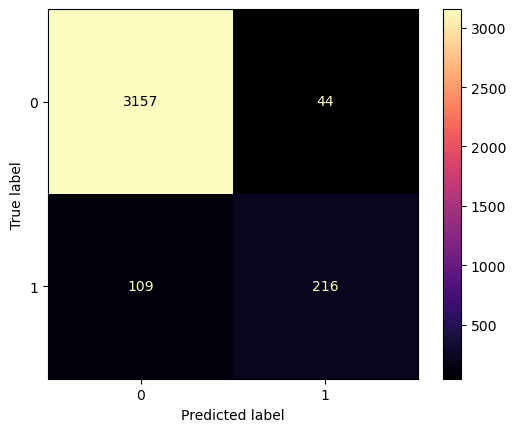

In [34]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test_array, y_test_pred_log_reg,
    cmap = 'magma'
);
plt.show()

In [35]:
print(classification_report(y_test_array, y_test_pred_log_reg))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3201
           1       0.83      0.66      0.74       325

    accuracy                           0.96      3526
   macro avg       0.90      0.83      0.86      3526
weighted avg       0.95      0.96      0.95      3526



# Creating a K-Nearest Neighbors Model

In [36]:
parameters_knn = {'n_neighbors':range(1, 51), 
              'weights':['uniform', 'distance']}

GridSearchCV performs an exhaustive search over specified parameter values for an estimator. It takes several parameters, including the estimator you want to use, the parameters you want to tune, and the scoring metric you wish to use to evaluate the model’s performance.

In [37]:
grid_search_knn = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters_knn, 
                           scoring = 'accuracy')

In [38]:
grid_search_knn.fit(x_train_array, y_train_array)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [39]:
knn_clf = grid_search_knn.best_estimator_

In [40]:
y_test_pred_knn = knn_clf.predict(x_test_array)

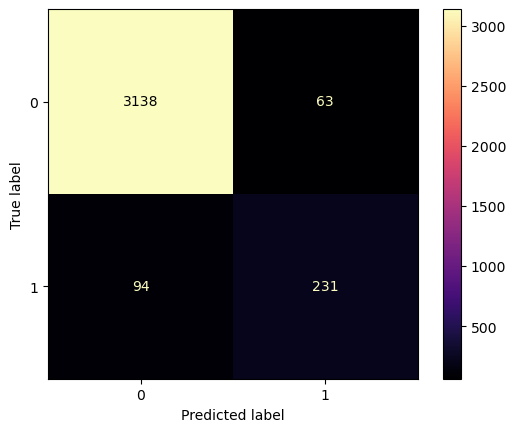

In [41]:
sns.reset_orig()

# Create a confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test_array, y_test_pred_knn,
    labels = knn_clf.classes_,
    cmap = 'magma'
);
plt.show()

In [42]:
print(classification_report(y_test_array, y_test_pred_knn, target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.79      0.71      0.75       325

    accuracy                           0.96      3526
   macro avg       0.88      0.85      0.86      3526
weighted avg       0.95      0.96      0.95      3526



# Creating a Support Vector Machines Model

For SVC we prefer to scale our features in a specific range. In this case, we will scale the features between -1 and 1.

In [43]:
scaling = MinMaxScaler(feature_range=(-1,1))
x_train_rescaled = scaling.fit_transform(x_train_array)
x_test_rescaled = scaling.transform(x_test_array)

In [44]:
tuned_parameters = {'kernel':['linear', 'poly', 'rbf'],
                    'C':range(1, 11),
                    'gamma': ['scale', 'auto']}

In [45]:
grid_search_svc = GridSearchCV(svm.SVC(), tuned_parameters, scoring='accuracy')

In [46]:
grid_search_svc.fit(x_train_rescaled, y_train_array)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 11), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [47]:
svc_clf = grid_search_svc.best_estimator_

In [48]:
y_test_pred_svc = svc_clf.predict(x_test_rescaled)

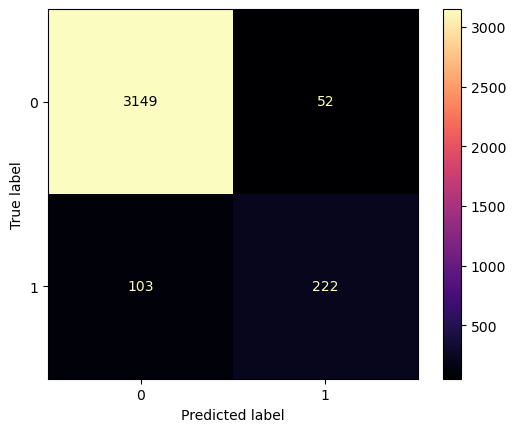

In [49]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test_array, y_test_pred_svc,
    labels = svc_clf.classes_,
    cmap = 'magma'
);
plt.show()

In [50]:
print(classification_report(y_test_array, 
                            y_test_pred_svc, 
                            target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.81      0.68      0.74       325

    accuracy                           0.96      3526
   macro avg       0.89      0.83      0.86      3526
weighted avg       0.95      0.96      0.95      3526



# Creating a Decision Trees Model

Decision trees use a parameter called alpha that helps to avoid overfitting. This technique is also called pruning. We will use GridSearchCV to find the best parameter to achieve the highest accuracy score.

In [51]:
tree_parameters = [{"ccp_alpha" : [0, 0.001, 0.002, 0.003, 0.004, 0.005]}]

In [52]:
grid_search_dt = GridSearchCV(tree.DecisionTreeClassifier(random_state=365), 
                              tree_parameters, 
                              scoring='accuracy')

In [53]:
grid_search_dt.fit(x_train_array, y_train_array)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=365),
             param_grid=[{'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]}],
             scoring='accuracy')

In [54]:
dt_clf = grid_search_dt.best_estimator_

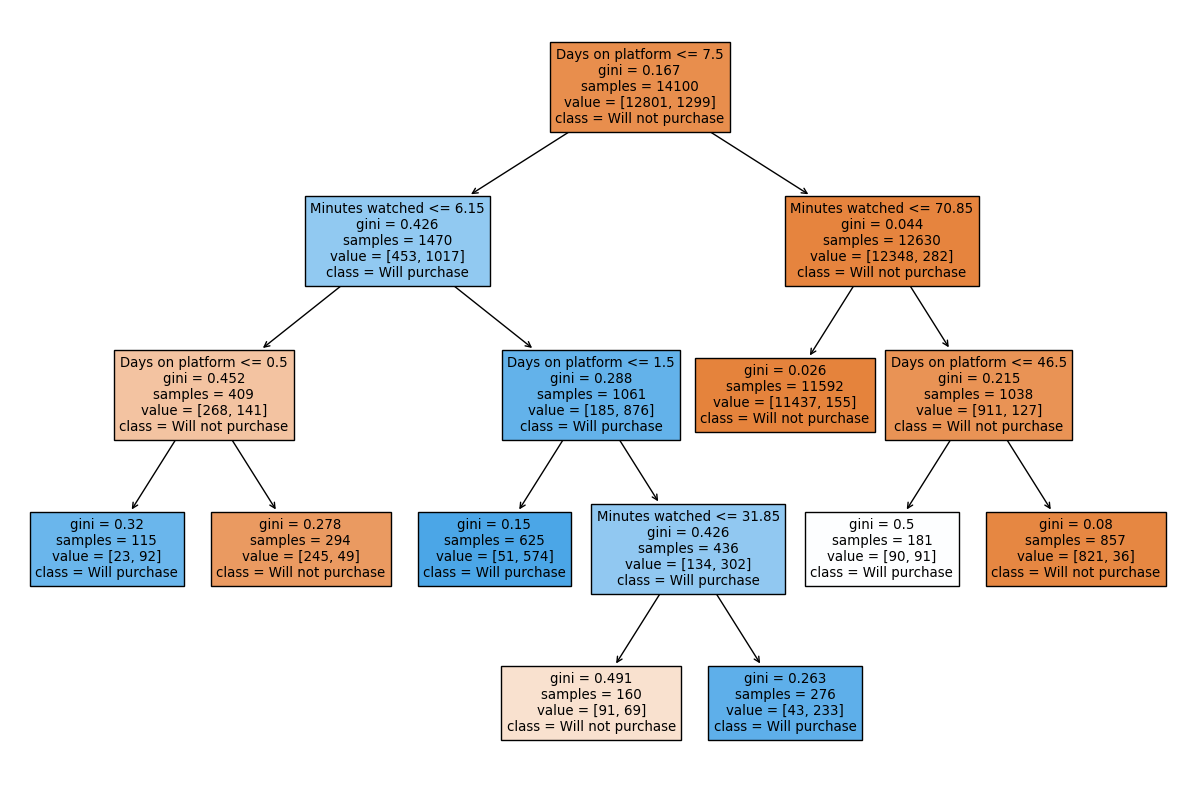

In [55]:
plt.figure(figsize=(15,10))

tree.plot_tree(dt_clf, 
          filled=True, 
          feature_names = ['Days on platform', 
                           'Minutes watched', 
                           'Courses started',
                           'Practice exams passed', 
                           'Time spent on exams', 
                           'Student country encoded'], 
          class_names = ['Will not purchase', 
                         'Will purchase'])

plt.show()

First interpretation: the decision tree shows that the only features influencing the decision are days_on_platform and minutes_watched.

In [56]:
y_test_pred_dt = dt_clf.predict(x_test_array)

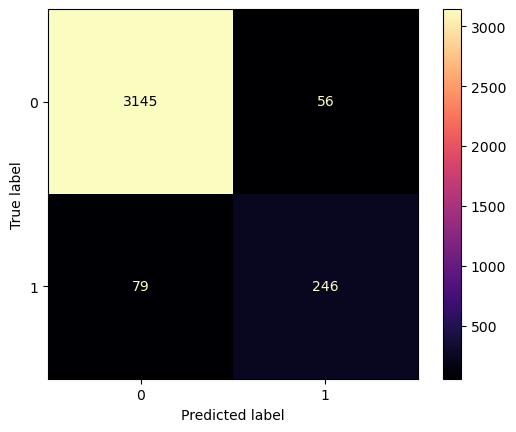

In [57]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test_array, y_test_pred_dt,
    labels = dt_clf.classes_,
    cmap = 'magma'
);
plt.show()

In [58]:
print(classification_report(y_test_array, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3201
           1       0.81      0.76      0.78       325

    accuracy                           0.96      3526
   macro avg       0.90      0.87      0.88      3526
weighted avg       0.96      0.96      0.96      3526



# Creating a Random Forests Model

We will use the best alpha value that we found out during the previous task.

In [59]:
rf_clf = RandomForestClassifier(ccp_alpha=0.001, random_state=365)

In [60]:
rf_clf.fit(x_train_array, y_train_array)

RandomForestClassifier(ccp_alpha=0.001, random_state=365)

In [61]:
y_test_pred_rf = rf_clf.predict(x_test_array)

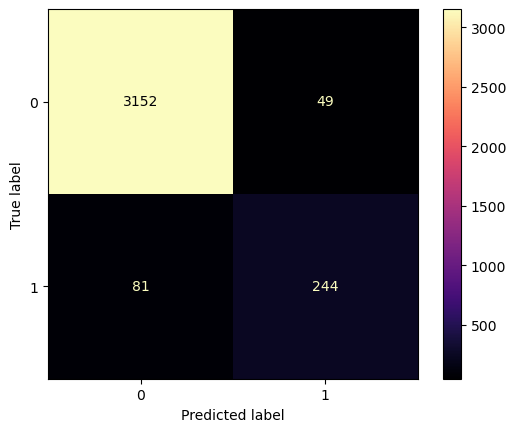

In [62]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test_array, y_test_pred_rf,
    labels = rf_clf.classes_,
    cmap = 'magma' 
);
plt.show()

In [63]:
print(classification_report(y_test_array, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.83      0.75      0.79       325

    accuracy                           0.96      3526
   macro avg       0.90      0.87      0.88      3526
weighted avg       0.96      0.96      0.96      3526



# Results interpretation

**What observations and conclusions can we make based on the confusion matrices?**

In [64]:
print('Logistic Regression:')
print(classification_report(y_test_array, 
                            y_test_pred_log_reg, 
                            target_names = ['0', '1']))
print('K-Nearest_Neighbors:')
print(classification_report(y_test_array, 
                            y_test_pred_knn, 
                            target_names = ['0', '1']))
print('Support Vector Machines:')
print(classification_report(y_test_array, 
                            y_test_pred_svc, 
                            target_names = ['0', '1']))
print('Decision Trees:')
print(classification_report(y_test_array, 
                            y_test_pred_dt,
                            target_names = ['0', '1']))
print('Random Forests:')
print(classification_report(y_test_array, 
                            y_test_pred_rf, 
                            target_names = ['0', '1']))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3201
           1       0.83      0.66      0.74       325

    accuracy                           0.96      3526
   macro avg       0.90      0.83      0.86      3526
weighted avg       0.95      0.96      0.95      3526

K-Nearest_Neighbors:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.79      0.71      0.75       325

    accuracy                           0.96      3526
   macro avg       0.88      0.85      0.86      3526
weighted avg       0.95      0.96      0.95      3526

Support Vector Machines:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.81      0.68      0.74       325

    accuracy                           0.96      3526
   macro avg       0.89      0.83      0.86      3526
weighte

Studying the models’ classification reports, we see that their accuracy is impressive at around 0.96. But this metric is so high because many students were correctly predicted to keep their free plan (0 class). For this reason, we prefer to evaluate the models' performances through the F1 score metrics of the second class (1=purchased).  

The ones with the highest F1 score for second class are the decision trees and random forests models, with 0.78 and 0.79 results.

**How can we use the results and what can we do to improve the models?**

Machine learning models such as these are highly valuable to a company. They help, for example, the marketing team with concentrating campaign budgets on advertisements more optimally. We can retrieve a list of students most likely to purchase a subscription using the models designed. Those students can be targeted through paid social media advertisements and exclusive offers.
We should be aware of the risks the decision to purchase a product depends not only on the behavior inside the platform but also on the student's demographics, financial status, and daily workload. Other elements of human behavior are challenging to predict.

The data for this project was highly imbalanced. Some techniques deal with such datasets as over and undersampling, but these come with limitations. In the case of oversampling, we create more datapoints, but that doesn’t mean we bring new and valuable information to the table. The latest datapoints are generated based on our knowledge of the minority class. Similarly, with undersampling, we reduce the majority class size at the cost of losing valuable information. 
Other ways to increase the models’ performance include reducing the problem’s dimensionality or searching for other independent variables. Such could be participation in the Q&A hub, number of logins, price page visits, etc. More exhaustive grid searches and better fine-tuning could also enhance the performance of the models. 
Finally, we can go beyond the machine learning realm and implement a neural network model that could spot patterns that machine learning models miss.
